In [19]:
# Dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy import stats
import numpy as np
from numpy.polynomial.polynomial import polyfit
%matplotlib inline
matplotlib.style.use('ggplot')
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)


In [20]:
#Bring in the csv file created from the Crime Data and convert to a dataframe
csvpath = os.path.join("Yelp_reformat.csv")
yelptest_df = pd.read_csv(csvpath, encoding="UTF-8")
yelptest_df.columns=['County', 'Crime Rate per 100k', 'Murder', 'Rape', 'Robbery', 'Assault', 'Burglary',
                   'Larceny', 'MV Theft', 'Arson', 'Population', 'Avg_Rating','Median_Rating','Avg_Price',
                    'Rest_Count', 'Avg_Lat', 'Avg_Lng', 'CountyName', 'State']
yelptest_df.head()

,County,Crime Rate per 100k,Murder,Rape,Robbery,Assault,Burglary,Larceny,MV Theft,Arson,Population,Avg_Rating,Median_Rating,Avg_Price,Rest_Count,Avg_Lat,Avg_Lng,CountyName,State
0,"St. Louis city, MO",1791.995377,119,200,1778,3609,4995,13791,3543,464,318416,4.370,4.50,1.977778,50,38.626690,-90.293315,St. Louis city,MO
1,"Crittenden County, AR",1754.914968,8,38,165,662,1482,1753,189,28,49746,3.360,3.50,1.357143,50,35.169865,-90.424857,Crittenden County,AR
2,"Alexander County, IL",1664.700485,1,2,5,119,82,184,12,2,7629,4.160,4.00,1.720000,50,37.258090,-89.520924,Alexander County,IL
3,"Kenedy County, TX",1456.310680,0,3,1,2,5,4,4,0,412,3.625,3.75,1.200000,8,27.232554,-97.740608,Kenedy County,TX
4,"De Soto Parish, LA",1447.402430,3,4,17,368,149,494,60,0,27083,3.875,4.00,1.285714,16,32.065037,-93.699333,De Soto Parish,LA


In [21]:
#Create rates per 10k population
yelptest_df["Murder_per_10K"] = yelptest_df["Murder"]/yelptest_df["Population"]*10000
yelptest_df["Robbery_per_10K"] = yelptest_df["Robbery"]/yelptest_df["Population"]*10000
yelptest_df["Burglary_per_10K"] = yelptest_df["Burglary"]/yelptest_df["Population"]*10000
yelptest_df["MV_Theft_per_10K"] = yelptest_df["MV Theft"]/yelptest_df["Population"]*10000
yelptest_df["Larceny_per_10K"] = yelptest_df["Larceny"]/yelptest_df["Population"]*10000
yelptest_df["Assault_per_10K"] = yelptest_df["Assault"]/yelptest_df["Population"]*10000
yelptest_df["Rape_per_10K"] = yelptest_df["Rape"]/yelptest_df["Population"]*10000
yelptest_df["Arson_per_10K"] = yelptest_df["Arson"]/yelptest_df["Population"]*10000

yelptest_df.head()

,County,Crime Rate per 100k,Murder,Rape,Robbery,Assault,Burglary,Larceny,MV Theft,Arson,...,CountyName,State,Murder_per_10K,Robbery_per_10K,Burglary_per_10K,MV_Theft_per_10K,Larceny_per_10K,Assault_per_10K,Rape_per_10K,Arson_per_10K
0,"St. Louis city, MO",1791.995377,119,200,1778,3609,4995,13791,3543,464,...,St. Louis city,MO,3.737249,55.838903,156.870258,111.269534,433.112658,113.342294,6.281091,14.572132
1,"Crittenden County, AR",1754.914968,8,38,165,662,1482,1753,189,28,...,Crittenden County,AR,1.608170,33.168496,297.913400,37.993004,352.390142,133.076026,7.638805,5.628593
2,"Alexander County, IL",1664.700485,1,2,5,119,82,184,12,2,...,Alexander County,IL,1.310788,6.553939,107.484598,15.729453,241.184952,155.983746,2.621576,2.621576
3,"Kenedy County, TX",1456.310680,0,3,1,2,5,4,4,0,...,Kenedy County,TX,0.000000,24.271845,121.359223,97.087379,97.087379,48.543689,72.815534,0.000000
4,"De Soto Parish, LA",1447.402430,3,4,17,368,149,494,60,0,...,De Soto Parish,LA,1.107706,6.277000,55.016062,22.154119,182.402245,135.878595,1.476941,0.000000


In [22]:
# Change df
newyelp_df =  yelptest_df

In [23]:
pop = newyelp_df["Population"]
murder = newyelp_df["Murder_per_10K"]
crime = newyelp_df["Crime Rate per 100k"]
rating = newyelp_df["Avg_Rating"]
robbery = newyelp_df["Robbery_per_10K"]
burglary = newyelp_df["Burglary_per_10K"]
MV_theft = newyelp_df["MV_Theft_per_10K"]
larceny = newyelp_df["Larceny_per_10K"]
rape = newyelp_df["Rape_per_10K"]
arson = newyelp_df["Arson_per_10K"]
assault = newyelp_df["Assault_per_10K"]

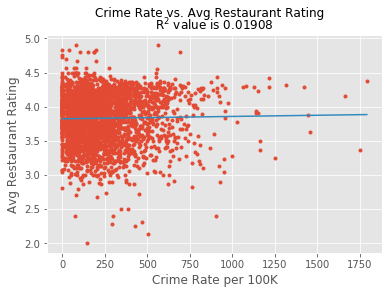

In [24]:
#Compare Crime per 100K to the Avg Rating
x=crime
y=rating
c = (crime).corr(rating)
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.suptitle("Crime Rate vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("Crime Rate per 100K")
plt.ylabel("Avg Restaurant Rating")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=12)


plt.savefig("img_crime_rating.png")

plt.show()

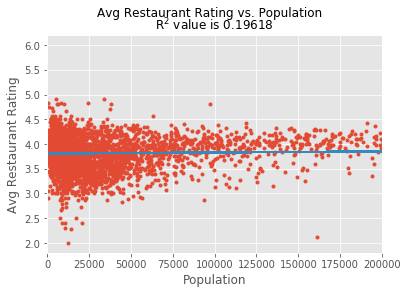

In [25]:
#Compare Avg Rating to Population
x=pop
y=rating
c = (pop).corr(rating)
b, m = polyfit(x, y, 1)
plt.xlim(0,200000)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.suptitle("Avg Restaurant Rating vs. Population",fontsize=12)
plt.xlabel("Population")
plt.ylabel("Avg Restaurant Rating")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=12)

plt.savefig("img_pop_rating.png")
plt.show()

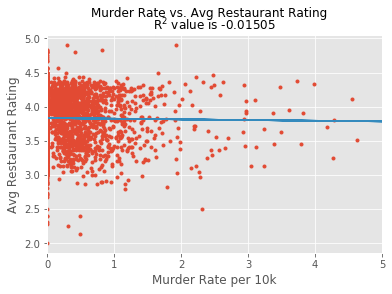

In [26]:
#Compare Murder per 10K to the avg rating
x=murder
y=rating
c = (murder).corr(rating)
b, m = polyfit(x, y, 1)
plt.xlim(0,5)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.suptitle("Murder Rate vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("Murder Rate per 10k")
plt.ylabel("Avg Restaurant Rating")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=12)

plt.savefig("img_murder_rating.png")

plt.show()


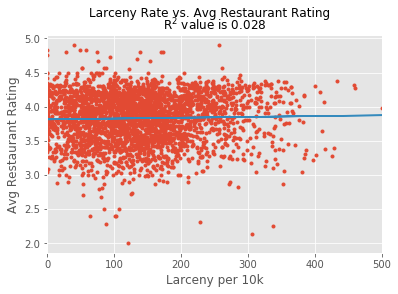

In [27]:
#Compare Larceny per 10K to the avg rating
x=larceny
y=rating
c = (larceny).corr(rating)
b, m = polyfit(x, y, 1)
plt.xlim(0,500)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.suptitle("Larceny Rate vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("Larceny per 10k")
plt.ylabel("Avg Restaurant Rating")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=12)
plt.savefig("img_larceny_rating.png")

plt.show()

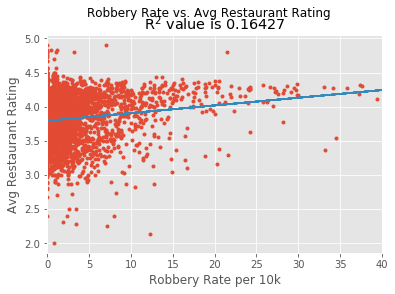

In [28]:
#Compare Robbery per 10k to Avg Yelp Rating
x=robbery
y=rating
c = (robbery).corr(rating)
b, m = polyfit(x, y, 1)
plt.xlim(0,40)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.suptitle("Robbery Rate vs. Avg Restaurant Rating")
plt.xlabel("Robbery Rate per 10k")
plt.ylabel("Avg Restaurant Rating")
plt.title ("R$^2$ value is "+ str(round(c,5)))

plt.savefig("img_robbery_rating.png")

plt.show()

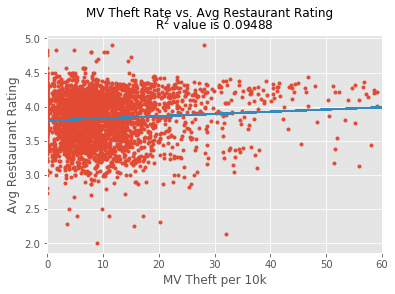

In [29]:
#Compare MV Theft to Avg Yelp Rating
x=MV_theft
y=rating
c = (MV_theft).corr(rating)
b, m = polyfit(x, y, 1)
plt.xlim(0,60)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.suptitle("MV Theft Rate vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("MV Theft per 10k")
plt.ylabel("Avg Restaurant Rating")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=12)

plt.savefig("img_MV_theft_rating.png")

plt.show()



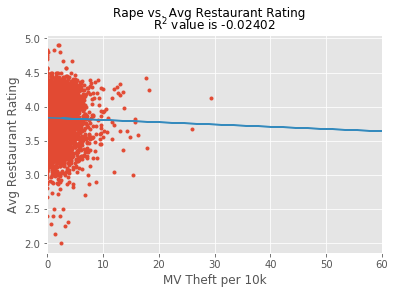

In [30]:
#Compare Rape to Avg Yelp Rating
x=rape
y=rating
c = (rape).corr(rating)
b, m = polyfit(x, y, 1)
plt.xlim(0,60)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.suptitle("Rape vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("MV Theft per 10k")
plt.ylabel("Avg Restaurant Rating")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=12)

plt.savefig("img_Rape_rating.png")

plt.show()

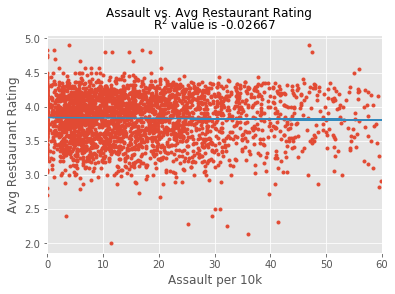

In [31]:
#Compare Assault to Avg Yelp Rating
x=assault
y=rating
c = (assault).corr(rating)
b, m = polyfit(x, y, 1)
plt.xlim(0,60)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.suptitle("Assault vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("Assault per 10k")
plt.ylabel("Avg Restaurant Rating")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=12)

plt.savefig("img_Rape_rating.png")

plt.show()

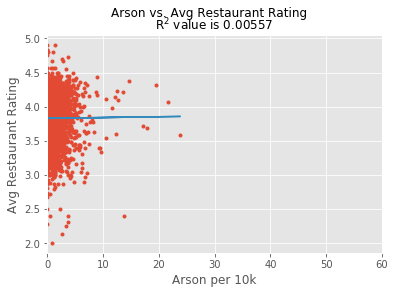

In [32]:
#Compare Arson to Avg Yelp Rating
x=arson
y=rating
c = (arson).corr(rating)
b, m = polyfit(x, y, 1)
plt.xlim(0,60)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.suptitle("Arson vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("Arson per 10k")
plt.ylabel("Avg Restaurant Rating")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=12)

plt.savefig("img_Arson_rating.png")

plt.show()

In [33]:
newyelp_df = newyelp_df.reset_index (drop = True)

In [34]:
# Create a list of coordinates
Avg_Lat = list(newyelp_df["Avg_Lat"])
Avg_Lng = list(newyelp_df["Avg_Lng"])
Crime_rate = list(crime)

# coordinates = zip(newyelp_df["Avg_Lat"], newyelp_df["Avg_Lng"])
coordinates = newyelp_df[["Avg_Lat", "Avg_Lng"]]

print(Crime_rate [1])


print(coordinates)


1754.914968
        Avg_Lat     Avg_Lng
0     38.626690  -90.293315
1     35.169865  -90.424857
2     37.258090  -89.520924
3     27.232554  -97.740608
4     32.065037  -93.699333
5     39.293058  -76.604438
6     35.137195  -89.996416
7     34.608735  -79.684026
8     39.506570 -119.793574
9     38.903576  -77.029766
10    34.435796  -79.360599
11    37.112378  -89.541352
12    39.952757  -75.161631
13    40.668338 -117.851375
14    34.202377  -82.157359
15    35.649753  -88.835809
16    36.165870  -86.777611
17    39.772026  -86.149959
18    42.273634  -83.201840
19    39.030858  -94.363053
20    36.217222  -89.703842
21    29.956255  -90.069481
22    34.756708  -92.374099
23    34.286566  -91.980533
24    35.473234  -95.466352
25    33.259648  -81.418962
26    30.547360  -90.475043
27    33.839477  -79.110814
28    31.602311  -84.194677
29    34.196854  -97.153639
...         ...         ...
3079  40.695304  -97.595457
3080  47.323349 -106.908973
3081  44.468577 -100.294332
3082  37

In [35]:
# Create a heat map of crime rates
fig = gmaps.figure() 
heat_layer = gmaps.heatmap_layer(coordinates, weights=crime, max_intensity=600)
fig.add_layer(heat_layer)
plt.savefig("img_crime_heat.png")
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [36]:
# Create a heat map of ratings
fig = gmaps.figure() 
heat_layer = gmaps.heatmap_layer(coordinates, weights=rating, max_intensity=5)
fig.add_layer(heat_layer)
plt.savefig("img_ratings_heat.png")
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>